In [59]:
!pip install PyDrive

You are using pip version 18.1, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [60]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

In [61]:
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

b'Hello, TensorFlow!'


In [62]:
import glob
import os
import numpy as np
import logging
#for filename in glob.glob(os.path.join('C:\\Users\\gentrt\\Documents\\Personal\\untied\\data', "*.jpg")):
train = pd.read_csv('C:\\Users\\gentrt\\Documents\\Personal\\untied\\data\\trainingset.csv')

100%|████████████████████████████████████████████████████████████████████████████████| 149/149 [00:02<00:00, 63.14it/s]


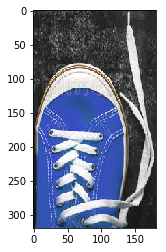

In [63]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('C:\\Users\\gentrt\\Documents\\Personal\\untied\\data\\' + train['File Name'][i], target_size=(320,180), grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
    plt.imshow(img)
X = np.array(train_image)

In [64]:
y=train['Classification'].values
y = to_categorical(y)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [66]:
# model = Sequential()
# model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(320,180,3)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(3, activation='softmax'))

In [67]:
from keras.layers.normalization import BatchNormalization

model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(320, 180, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(3, activation = 'softmax'))

In [68]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [69]:
model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Train on 119 samples, validate on 30 samples
Epoch 1/15
119/119 [==============================] - ETA: 9s - loss: 1.2648 - acc: 0.406 - ETA: 5s - loss: 1.3613 - acc: 0.390 - ETA: 2s - loss: 1.3586 - acc: 0.406 - 11s 90ms/step - loss: 1.3588 - acc: 0.4118 - val_loss: 1.2329 - val_acc: 0.3667
Epoch 2/15
119/119 [==============================] - ETA: 6s - loss: 0.4923 - acc: 0.875 - ETA: 4s - loss: 0.5844 - acc: 0.812 - ETA: 1s - loss: 0.6305 - acc: 0.781 - 9s 79ms/step - loss: 0.5663 - acc: 0.8067 - val_loss: 1.3466 - val_acc: 0.5333
Epoch 3/15
119/119 [==============================] - ETA: 6s - loss: 0.2419 - acc: 0.937 - ETA: 4s - loss: 0.2467 - acc: 0.921 - ETA: 1s - loss: 0.3144 - acc: 0.875 - 10s 80ms/step - loss: 0.3022 - acc: 0.8908 - val_loss: 1.0380 - val_acc: 0.5333
Epoch 4/15
119/119 [==============================] - ETA: 6s - loss: 0.2054 - acc: 0.937 - ETA: 4s - loss: 0.2210 - acc: 0.953 - ETA: 1s - loss: 0.2040 - acc: 0.958 - 10s 81ms/step - loss: 0.1793 - acc: 0.9664 -

In [82]:
test = pd.read_csv('C:\\Users\\gentrt\\Documents\\Personal\\untied\\data\\testingset.csv')

In [96]:
test_image = []
for i in tqdm(range(test.shape[0])):
    img = image.load_img('C:\\Users\\gentrt\\Documents\\Personal\\untied\\data\\' + test['File Name'][i], target_size=(320,180), grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
testArr = np.array(test_image)

100%|█████████████████████████████████████████████████████████████████████████████████| 45/45 [00:00<00:00, 369.75it/s]


In [97]:
# making predictions
prediction = model.predict_classes(testArr)

In [99]:
tmp = 0
for i in range(len(prediction)):
    if prediction[i] == 0:
        print("untied")
    elif prediction[i] == 1:
        print("tied")
    else:
        print("no laces")
        
    if prediction[i] == test["Classification"][i]:
        tmp+=1
print(tmp / len(prediction))

tied
untied
untied
tied
tied
tied
untied
untied
untied
no laces
tied
tied
tied
tied
tied
tied
tied
tied
tied
untied
tied
tied
untied
tied
untied
tied
tied
tied
tied
tied
tied
tied
untied
untied
no laces
tied
untied
no laces
tied
tied
tied
tied
untied
untied
untied
0.5333333333333333
